In [59]:
# Importing the libraries

import numpy as np
import pandas as pd 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing

In [62]:
# Reading the CSV file through pandas

df = pd.read_csv('vgsales.csv')

print("Shape ", df.shape)
df.head()

Shape  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# Cheking for the null values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# droping the null values
data = data.dropna()

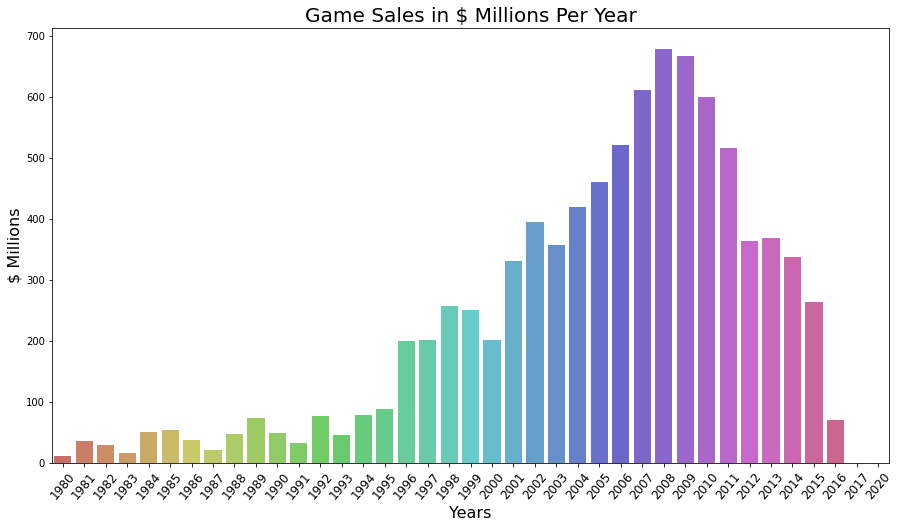

In [32]:
# Some insights in the dataset
# Global sales in a year

y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(15,8))
ax = sns.barplot(y = y, x = x,palette="husl")
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

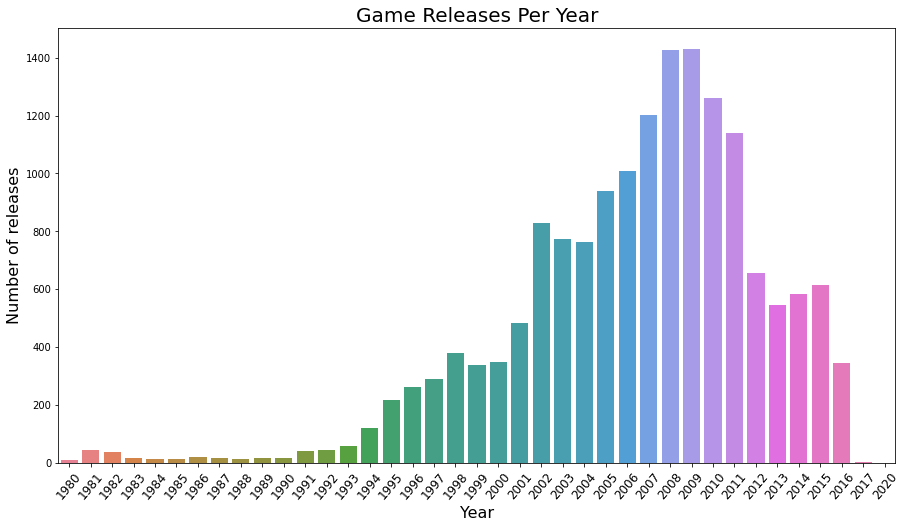

In [28]:
# Game releases per year

y = df.groupby(['Year']).count()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(15,8))
ax = sns.barplot(y = y, x = x, palette='husl')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Number of releases', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

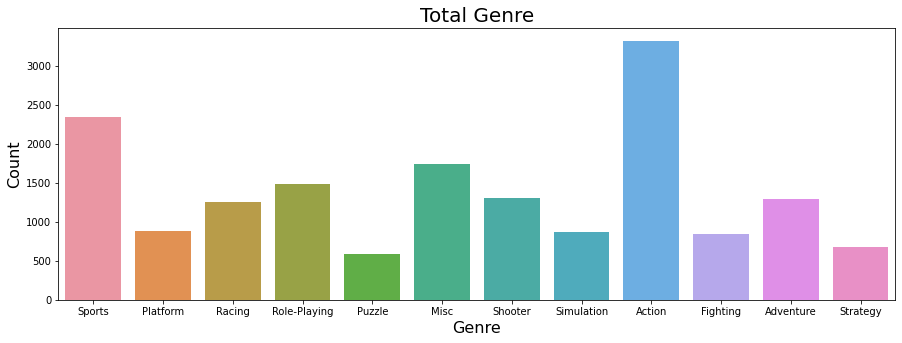

In [40]:
# Count genre

plt.figure(figsize=(15,5))
ax = sns.countplot(df['Genre'])
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
ax.set_title(label='Total Genre', fontsize=20)
plt.show()

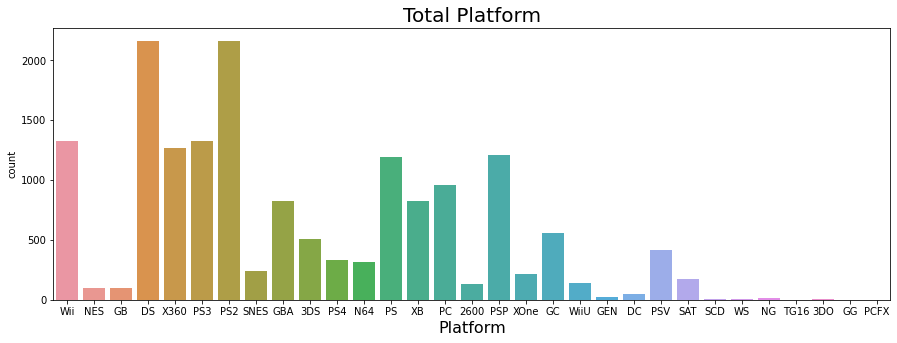

In [44]:
# Total Platform count


plt.figure(figsize=(15,5))
ax = sns.countplot(df['Platform'])
ax.set_xlabel(xlabel='Platform', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
ax.set_title(label='Total Platform', fontsize=20)
plt.show()

In [43]:
# Ccross tab for platform and genre

platGenre = pd.crosstab(df.Platform,df.Genre)
platGenre.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


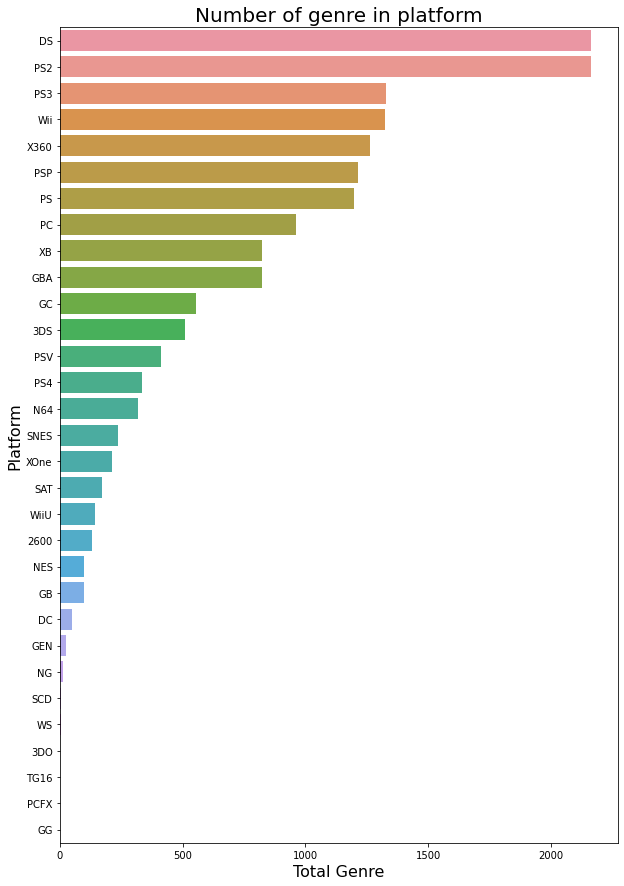

In [52]:
# Total genre in a platform

platGenreTotal =platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,15))
ax = sns.barplot(x=platGenreTotal.values,y=platGenreTotal.index)
ax.set_xlabel(xlabel='Total Genre', fontsize=16)
ax.set_ylabel(ylabel='Platform', fontsize=16)
ax.set_title(label='Number of genre in platform', fontsize=20)
plt.show()

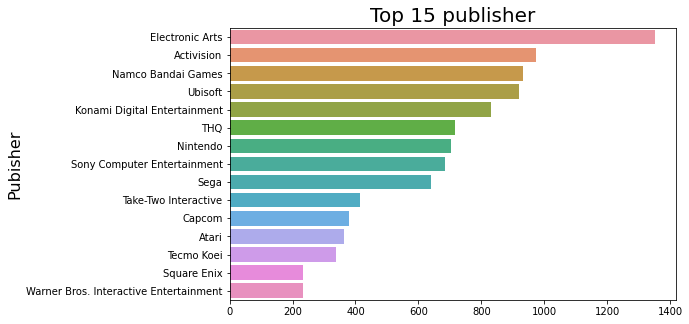

In [58]:
# Top 15 publisher

publisher = df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(15)
plt.figure(figsize=(8,5))
ax = sns.barplot(x=publisher.values,y=publisher.index)
# ax.set_xlabel(xlabel='Total Genre', fontsize=16)
ax.set_ylabel(ylabel='Pubisher', fontsize=16)
ax.set_title(label='Top 15 publisher', fontsize=20)
plt.show()

In [60]:
for column in df.columns:
    if df[column].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[column].values)) 
        df[column] = lbl.transform(list(df[column].values))

In [61]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


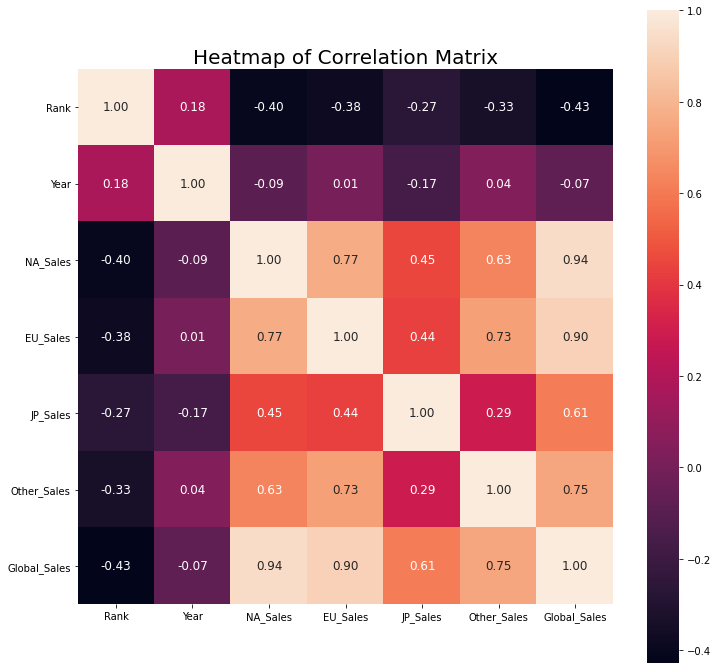

In [91]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr,
                 cbar = True,
                 square = True, 
                 annot=True, 
                 fmt= '.2f',
                 annot_kws={'size': 12}
                )
ax.set_xticklabels(labels = corr.columns.values)
ax.set_yticklabels(labels = corr.columns.values, rotation=0)
ax.set_title('Heatmap of Correlation Matrix', fontsize=20)
plt.show()